**Name:** Rana Elfakharany

**5/6 digits AUS ID:** 87725

In this homework you will be exploring corner detection, feature extraction, and image matching. Few things to keep in mind.

*   The use of cv2 is highly recommended for this homework.

*   The use of AI tools is allowed but efficiency is important.

*   Please submit a pdf **AND** a zip file to ilearn. Failure to do so will result in a 2 points deduction.

*   Please add your name and AUS id to the file in the first cell. Failure to do so will result in 4 points deduction.

*   A late penalty of 10 points per day will be applied.

*  For inquires please email asajun@aus.edu


Have fun 👍



---






### **Introduction:**

This section is a summary of few key terms from the lectures that are neccessary for this assessment. If you are comfortable with it feel free to move on to the first question.

<html>
<img src = https://docs.opencv.org/4.x/feature_building.jpg>
</html>

**What are features?**

Imagine that you are playing a jigsaw puzzle. Typically, you would look up for pieces with notable features that are easy for you to localize in the puzzle. Now let us assume that you were given the six pieces labelled from A to F in the image above. You are asked to specify its location in the image. In this case we would have the following:


*   A and B are flat surfaces and they are spread over a lot of area. It is difficult to find the exact location of these patches.
*   C and D are much more simple. They are edges of the building. You can find an approximate location, but exact location is still difficult. This is because the pattern is same everywhere along the edge. At the edge, however, it is different. An edge is therefore better feature compared to flat area, but not good enough (It is good in jigsaw puzzle for comparing continuity of edges).
*  Finally, E and F are some corners of the building. And they can be easily found. Because at the corners, wherever you move this patch, it will look different. So they can be considered as good features.


**So how do we find these features?**

We basically look for the regions in the image which have maximum variation when moved (by a small amount) in all regions around it. We call this process ***Feature Detection.*** Once you have found the features, you should be able to find the same in the other images as well. How is this done? We take a region around the feature, we explain it in our own words, like "upper part is blue sky, lower part is region from a building, on that building there is glass etc" and you search for the same area in the other images. Basically, you are describing the feature. Similarly, a computer also should describe the region around the feature so that it can find it in other images. We call this description ***Feature Description***.

Once you have the features and its description, you can find same features in all images and align them, stitch them together or do whatever you want.

Sounds good? Now let us do it using code!



---



**Q.1. Corner Detection [/20]**

1.1. Corner Detection is critical to extract good features. The first attempt to detect corners using a computer was that introduced by Chris Harris & Mike Stephens in 1988 and was named after the first hence the Harris Detector (poor Stephans...). Harris Detector tries to maximize the intensity difference per shift in order to detect a corner. This can be formulated as the following:

$$
E(u, v) = \sum_{x, y} w(x, y) \left[ I(x+u, y+v) - I(x, y) \right]^2
$$


Don't worry. In reality this is much simpler than what it looks like.

In this question, we will implement the Harris corner detector. Harris corner detector is dependent on the kernel size. For simplicity we will be using a kernel of size 1.

First, we need to find the sobel on x "$Ix$" and the sobel on y "$Iy$" derivatives. Compute the Sobel x and y gradients of AUS logo (AUS.png). Stick to the template provided. [/3]

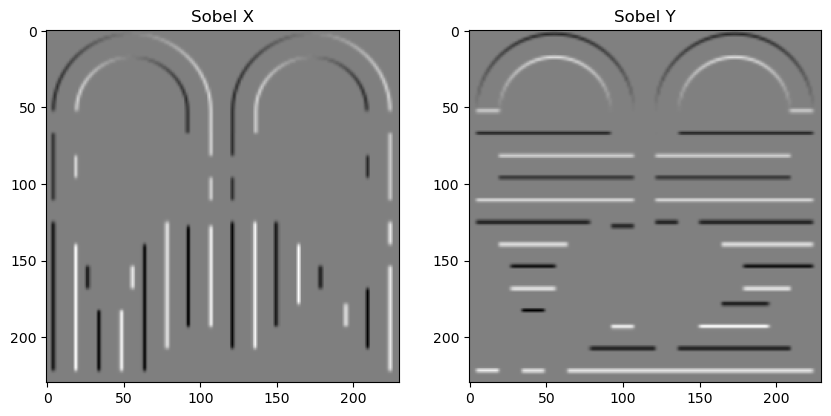

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image

img = cv2.imread('Q1/AUS.png')

#convert the image to grayscale
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute gradients using Sobel operators (use a kernel of 3)
I_x = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
I_y = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

# Plot Sobel x and Sobel y
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(I_x, cmap = 'gray')
plt.title('Sobel X')

plt.subplot(1, 2, 2)
plt.imshow(I_y, cmap = 'gray')
plt.title('Sobel Y')

plt.show()

Now we need to compute the Harris Matrix components which are shown below. [/3]
$$
H = \begin{bmatrix}
\sum_{i,j} I_x^2 & \sum_{i,j} I_x  I_y \\
\sum_{i,j} I_x  I_y & \sum_{i,j} I_y^2
\end{bmatrix}
$$


In [2]:
# Compute components of the Harris Matrix
I_x_squared = np.power(I_x,2)
I_y_squared = np.power(I_y,2)
I_x_y = I_x*I_y

# Apply Gaussian Blur to the components 
I_x_squared = cv2.GaussianBlur(I_x_squared,(3,3), 1)
I_y_squared = cv2.GaussianBlur(I_y_squared,(3,3), 1)
I_x_y = cv2.GaussianBlur(I_x_y,(3,3), 1)


Now we calculate the response. [/6]
$$
R = Det(H) - k*tr(H)^2
$$

where

$$
Det(H) = Ix^2Iy^2 - (IxIy)^2
$$

$$
tr(H) = Ix^2 + Iy^2
$$

In [3]:
# Compute the Harris corner response
k = 0.04
det_H = I_x_squared*I_y_squared-np.power(I_x_y,2)
trace_H = I_x_squared + I_y_squared
harris_response = det_H - k*np.power(trace_H,2)

In [4]:
print(harris_response)
print('Max = ', harris_response.max())
print('Min = ',harris_response.min())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Max =  36931990000.0
Min =  -14975641000.0


Finally, we see the keypoints detected.

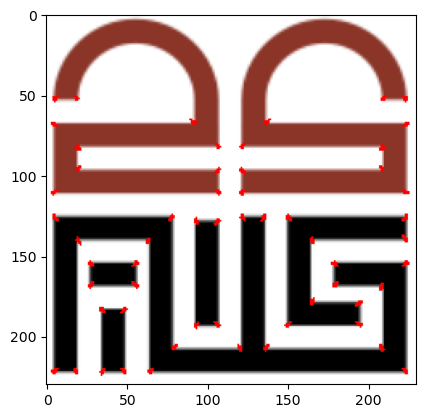

In [5]:
#harris response contrains a value for every pixel.
#for that we are picking the points with a response greater than
#a threshold (0.001) of the max value only.

#[0,0,255] changes the points color to red

img[harris_response > 0.001 * harris_response.max()] = [0, 0, 255]

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Use "cornerHarris" function in cv2 to verify your answer. [/6]

(Text(0.5, 1.0, 'Image'), ([], []), ([], []))

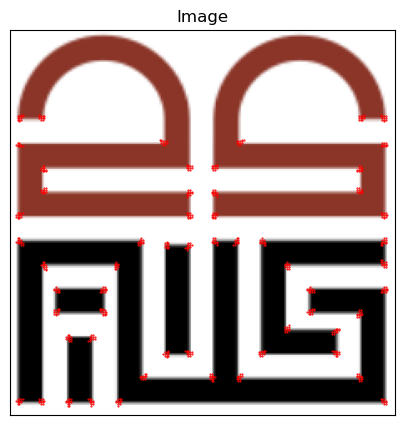

In [6]:
#Solution

img = cv2.imread('Q1/AUS.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Harris Corner 
harris_response = cv2.cornerHarris(image, blockSize=3, ksize=3, k=0.04)

threshold = 0.001 * harris_response.max()                                            
corner_mask = (harris_response > threshold).astype(np.uint8) * 255                  

# Get the x, y coordinates of the corners
coordinates = np.column_stack(np.where(corner_mask > 0))                            

# Display the original image and detected corners
plt.figure(figsize=(5, 5))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(111), plt.imshow(image, cmap='gray')
plt.scatter(coordinates[:, 1], coordinates[:, 0], color='red', marker='.', s=1)            
plt.title('Image'), plt.xticks([]), plt.yticks([])

How does the variable $k$ influence your output? [/2]

**Ans:**

$k$ is just a scalar that affects the sensitivity to corner. 
- Large $k$: A larger value of $k$ gives you less false corners, but you would then miss more real corners. Such a case leads to high precision. In other words, assuming the threshold value stays constant, a high $k$ value would give us only the strongest corners. 

- Smaller $k$: A smaller value for $k$ would give you more corners, but you would start getting more false corners (high recall). This means that the detector is now more sensitive to corners.



---
**Q.2. SIFT [/30]**

One major issue in harris corner detector is that it fails to detect the same features if the image was rescaled to a different size (See below).

<html>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*wfgQ600MfwD36lb7u-ka8g.png width="480" height="300">
</html>

In order to mitigate this issue, Scale Invariant Feature Transform (SIFT) was introduced by D. Lowa in 2004. SIFT is quite simple yet superior to Harris detector.

SIFT uses the Difference in Gaussians (DoG) concept. What this essentially means is that we will first apply a gaussian blur to an image $n$ times (ideally 5) where we increase the blurring sigma by double (ideally starting from sigma 1.6). Then we will find the result of subtracting each two consecutive images.

<html>
<img src=https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-09-25-14-18-26.png>
</html>

As we can see, this enhances the features detected. Later on we downsample the image (make it smaller) and repeat the same process. We call every set of $n$ blurred images an *octave*. We repeat this process for $m$ times (ideally 4). This allows SIFT to be **scale invariant**.

<html>
<img src=https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-09-24-18-27-46.png>
</html>

In Q2. Folder, pick the Monalisa that corresponds to your id. You may run the following cell to obtain the image easily. Make sure to show the output of this cell in your submission.

In [7]:
# @title Run this cell
id = input("Enter your id: ")
im = int(id) % 3
if(im == 0): print("Use Monalisa_A")
elif(im==1): print("Use Monalisa_B")
else: print("Use Monalisa_C")

Use Monalisa_C


2.1. Apply Gaussian Blur (ksize = 17) to the image assigned to you 5 times and display the results at each iteration. Start with an initial sigma value of 1.6. Use a grayscale image to reduce computations. [/6]

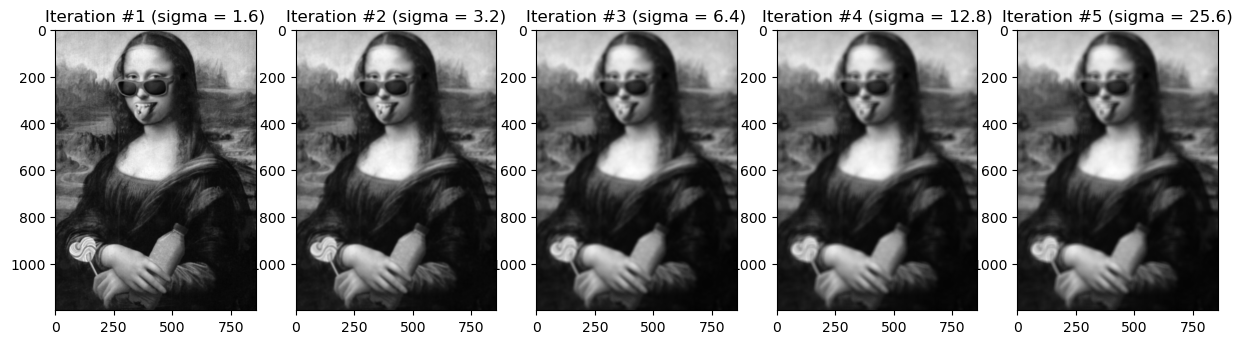

In [8]:
#Solution

image = cv2.imread('Q2/Monalisa_C.jpg', cv2.IMREAD_GRAYSCALE)

blur = image.copy()
gamma = 1.6
iterations = []
plt.figure(figsize=(15, 10))

# Do the following for 5 iterations:
# Apply Gaussian Blur using k*sigma
# Append the image to the iterations list to use it later for DoG
# Plot the image
for i in range (5):
    
    blurred = cv2.GaussianBlur(blur,(17,17), gamma)
    iterations.append(blurred)
    plt.subplot(1,5,i+1)
    plt.title('Iteration #' + str(i+1) + ' (sigma = ' + str(gamma) + ')')
    plt.imshow(blurred, cmap = 'gray')
    #plt.axis('off')
    gamma *= 2


2.2. Find the DoGs of the first octave that you just found [/5]

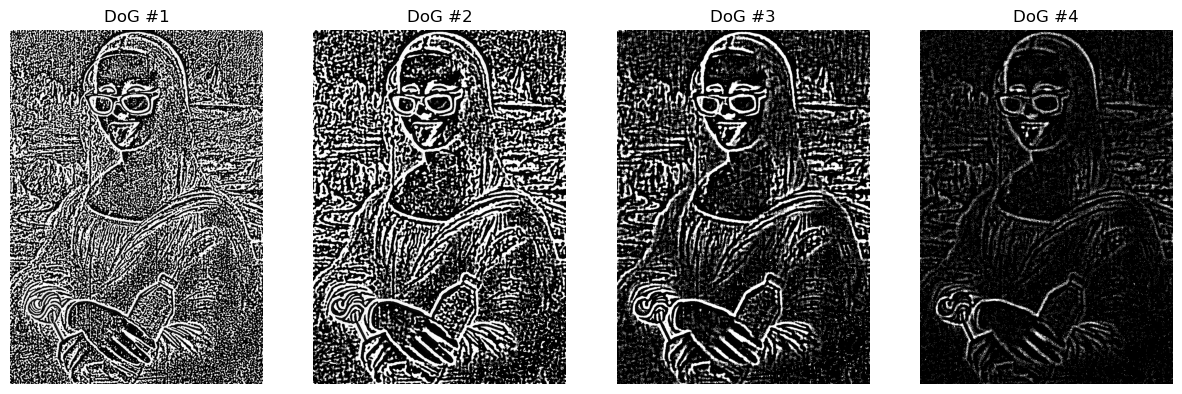

In [9]:
#Solution

DoGs = []
plt.figure(figsize=(15, 10))

# Using the iterations from the previous step, find each DoG by subtracting iterations[i+1] from iterations[i]
for i in range(len(iterations)-1):
    DoG = iterations[i]-iterations[i+1]
    DoGs.append(DoG)
    plt.subplot(1,len(iterations)-1,i+1)
    plt.title('DoG #' + str(i+1))
    plt.imshow(DoG, cmap = 'gray')
    plt.axis('off')


2.3. Find the same results for the second octave. [/4]

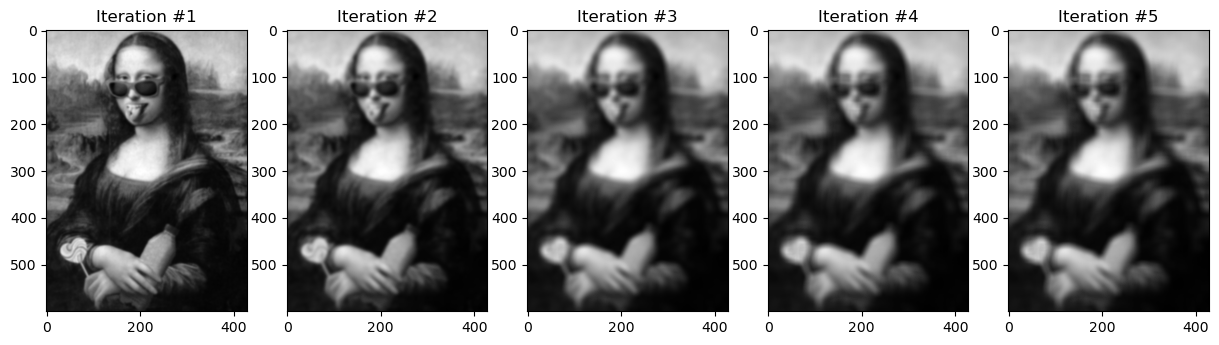

In [10]:
#Solution

# Downscaling the image to 50% of the height and width 
octave2_image = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)))

gamma = 1.6
iterations2 = []
plt.figure(figsize=(15, 10))

# Do the following for 5 iterations:
# Apply Gaussian Blur using k*sigma
# Append the image to the iterations list to use it later for DoG
# Plot the image
for i in range (5):
    
    octave2_image_blur = cv2.GaussianBlur(octave2_image,(17,17), gamma)
    iterations2.append(octave2_image_blur)
    gamma = gamma*2
    plt.subplot(1,5,i+1)
    plt.title('Iteration #' + str(i+1))
    plt.imshow(octave2_image_blur, cmap = 'gray')
    #plt.axis('off')


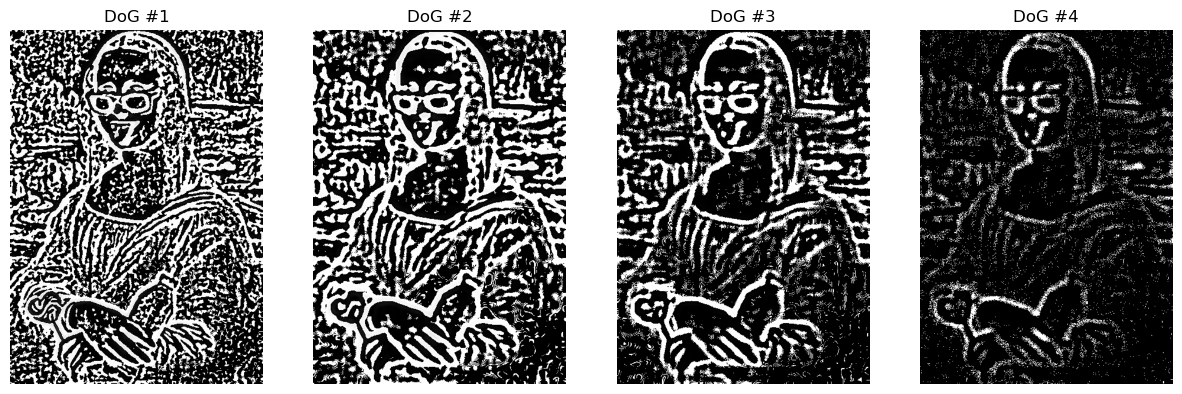

In [11]:
DoGs2 = []
plt.figure(figsize=(15, 10))

# Using the iterations from the previous step, find each DoG by subtracting iterations[i+1] from iterations[i]
for i in range(len(iterations2)-1):
    DoG2 = iterations2[i]-iterations2[i+1]
    DoGs2.append(DoG2)
    plt.subplot(1,len(iterations2)-1,i+1)
    plt.title('DoG #' + str(i+1))
    plt.imshow(DoG2, cmap = 'gray')
    plt.axis('off')

What happens next is that we need to find the keypoints. This is achieved by finding the pixel local maxima and minima for these images. A pixel is considered a keypoint if it has the maximum value with respect to the surrounding 8 pixels and to the same point in the image before it and after it within the same octave. In the figure below $x$ is our pixel of interest and the 26 green dots are those it is compared to.

<html>
<img src = https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-09-25-16-50-01-300x207.png>
</html>

From here onwards we will be using cv2 SIFT function to find these keypoints.

2.4. Use cv2 to detect 50 keypoints in your image. Keep it in grayscale and do not use any flag. [/5]

In [12]:
#Solution

import numpy as np
import cv2 as cv
#from google.colab.patches import cv2_imshow

#refer to this link for sift implementation
#https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

#DO NOT USE any flag!

sift = cv.SIFT_create(nfeatures = 50)
kp = sift.detect(image, None)

Now we have our keypoints, we need to describe them. For this, we need to obtain the orientation of each point to make it rotation invariant. Finding the orientation of these points is simple.

<html>
<img src=https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-09-25-19-22-24.png>
</html>

Let us assume that our keypoint is the red highlighted pixel in the image above. We need to find the gradient in x and y directions for this pixel before finding the angle.

$Gx = 55 - 46 = 9$

$Gy = 56 - 42 = 14$

$A = sqrt(9^2 +14^2) = 16.64 $

$θ = arctan(14/9) = 57.17°$


2.5. Find the magnitude and orientation of the point that corresponds to your Monalisa (A, B, or C) in the figure below. [/5]

<html>
<img src="https://i.ibb.co/SDjX3zx/Screenshot-2024-02-24-193642.png">
</html>

$Gx = 56 - 48 = 8$

$Gy = 60 - 46 = 14$

$A = sqrt(8^2 +14^2) = 16.125 $

$θ = arctan(14/8) = 1.0517 = 60.255°$

In [13]:
#Solution
Gx = 56-48
Gy = 60-46
A = np.sqrt(Gx**2 + Gy**2)
angle = np.degrees(np.arctan(Gy/Gx))

print('Magnitude = ', A, ', and Angle = ',angle, '°')

Magnitude =  16.1245154965971 , and Angle =  60.25511870305778 °


2.6. Use cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag to see the magnitude and orientation of your image. [/5]

(-0.5, 856.5, 1199.5, -0.5)

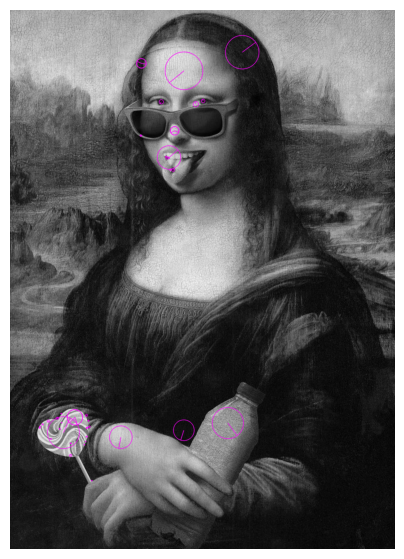

In [14]:
#Solution
plt.figure(figsize = (15,7))
img = cv.drawKeypoints(image, kp, -1, color = (255,0,255), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # drawing keypoints
plt.imshow(img)
plt.axis('off')

**Q.3. Image Matching [/20]**

In order to match two images, we need to calculate the keypoints of these two images along with their descriptors. To do so, one can directly utilize openCV as following

```
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp, des = sift.detectAndCompute(img,None)
```

Calculate the keypoints and descriptors for the original monalisa (Monaliza_original.jpg) and your own version of it (A, B, or C). Resize your image to the size of the original Monaliza before computing. [/10]

In [15]:
#Solution

# Read the original Monalisa image
original = cv.imread('Q2/Monalisa_original.jpg', cv.IMREAD_GRAYSCALE)

# Resize our version of the Monalisa to be the same shape as the original image
image = cv.resize(image, (original.shape[1], original.shape[0]))

print('Original shape = ', original.shape)
print('Monalisa C shape = ', image.shape)

# Compute the keypoints and descriptors 
sift = cv.SIFT_create()
kp_o, des_o = sift.detectAndCompute(original, None)
kp_c, des_c = sift.detectAndCompute(image, None)

Original shape =  (1788, 1200)
Monalisa C shape =  (1788, 1200)


Use cv.BFMatcher to match the two images using knn (k=2). As the number of points may be big. Use the code below to filter out the good keypoints only.

```
# the array "good" stores the wanted matches

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
```

Draw a conclusion on your results. [/10]





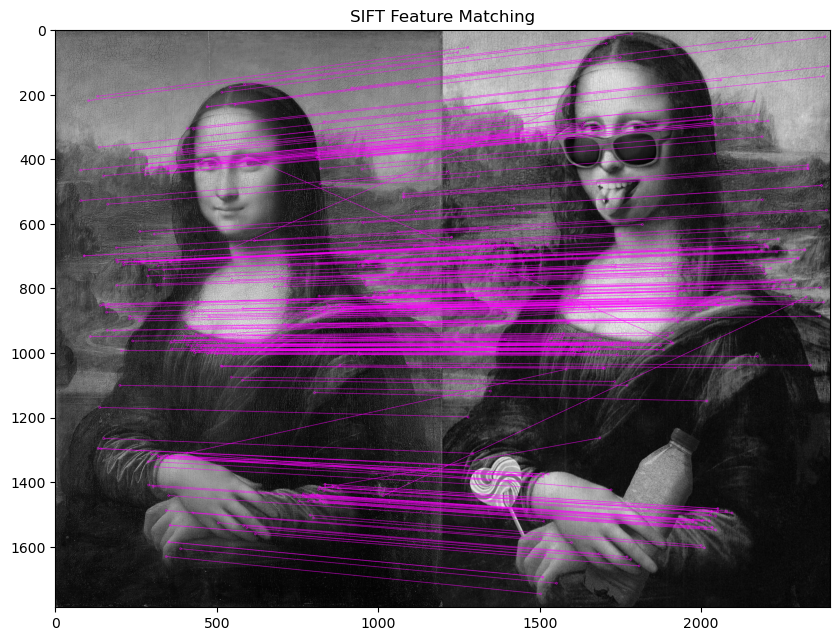

In [16]:
# Solution

bf = cv.BFMatcher()

# Match descriptors
matches = bf.knnMatch(des_o,des_c,k=2)
 
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
# cv.drawMatchesKnn expects list of lists as matches.
img_matches=cv.drawMatchesKnn(original,kp_o,image,kp_c,good,None,matchColor = (255,0,255),flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize = (10,10))
plt.imshow(img_matches)
plt.title('SIFT Feature Matching')
plt.show()

**ANS:** Using KNN match allows us to do a ratio test, where we consider the ratio of the distances between the best and second-best matches. If the ratio is below a certain threshold, the match is then considered valid. Using these valid matches, we can then visualize them as shown above. Doing this ratio test allows us to find the keypoints with higher confidence.

Q.4. RANSAC [/30]

for this question, you will need the following libraries. Please import them.

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = [15, 15]

Stitching is a task in which two images of the same object are taken from different angles are combined into one. In fact, it was what your phone technically do when you take a panorama image. In Q.4. folder, you will find pair of images for some books labelled with your assigned letter (A, B, or C). You are requierd to use SIFT and RANSAC to stitch these two images. To make your life easier I have provided you with helper functions that you just need to use if you want.

4.1. Read your right and left images then use the SIFT function to find the keypoints and descriptors needed for both images. Plot the found keypoints for both images together. [/5]

In [18]:
def read_image(path):
    img = cv2.imread(path)
    img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_gray, img, img_rgb

def SIFT(img):
    #siftDetector= cv2.xfeatures2d.SIFT_create() # limit 1000 points
    siftDetector= cv2.SIFT_create()  # depends on OpenCV version

    kp, des = siftDetector.detectAndCompute(img, None)
    return kp, des

def plot_sift(gray, rgb, kp):
    tmp = rgb.copy()
    img = cv2.drawKeypoints(gray, kp, tmp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img

(-0.5, 1199.5, 1599.5, -0.5)

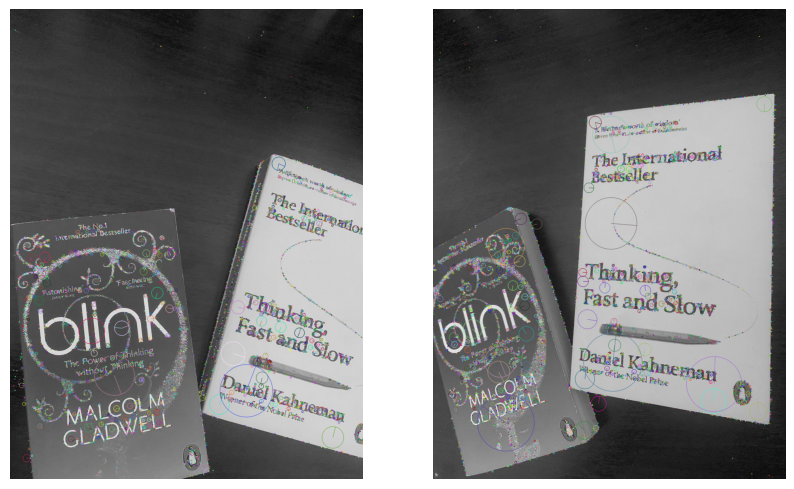

In [19]:
# your answer here

# Read the left and right images 
left_gray, left, left_rgb = read_image('Q4/C_L.jpeg')
right_gray, right, right_rgb = read_image('Q4/C_R.jpeg')

# Find the keypoints and descriptors
kp1, des1 = SIFT(left_rgb)
kp2, des2 = SIFT(right_rgb)

# Use the function to draw the keypoints
leftplot = plot_sift(left_gray, left_rgb, kp1)
rightplot = plot_sift(right_gray, right_rgb, kp2)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(leftplot)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(rightplot)
plt.axis('off')

Use the matcher function to find the matches between both images. Then plot these matches. Use a threshold of (0.5). [/5]

In [20]:
def plot_matches(matches, total_img):
    match_img = total_img.copy()
    offset = total_img.shape[1]/2
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(np.array(match_img).astype('uint8')) #　RGB is integer type

    ax.plot(matches[:, 0], matches[:, 1], 'xr')
    ax.plot(matches[:, 2] + offset, matches[:, 3], 'xr')

    ax.plot([matches[:, 0], matches[:, 2] + offset], [matches[:, 1], matches[:, 3]],
            'r', linewidth=0.5)

    plt.show()

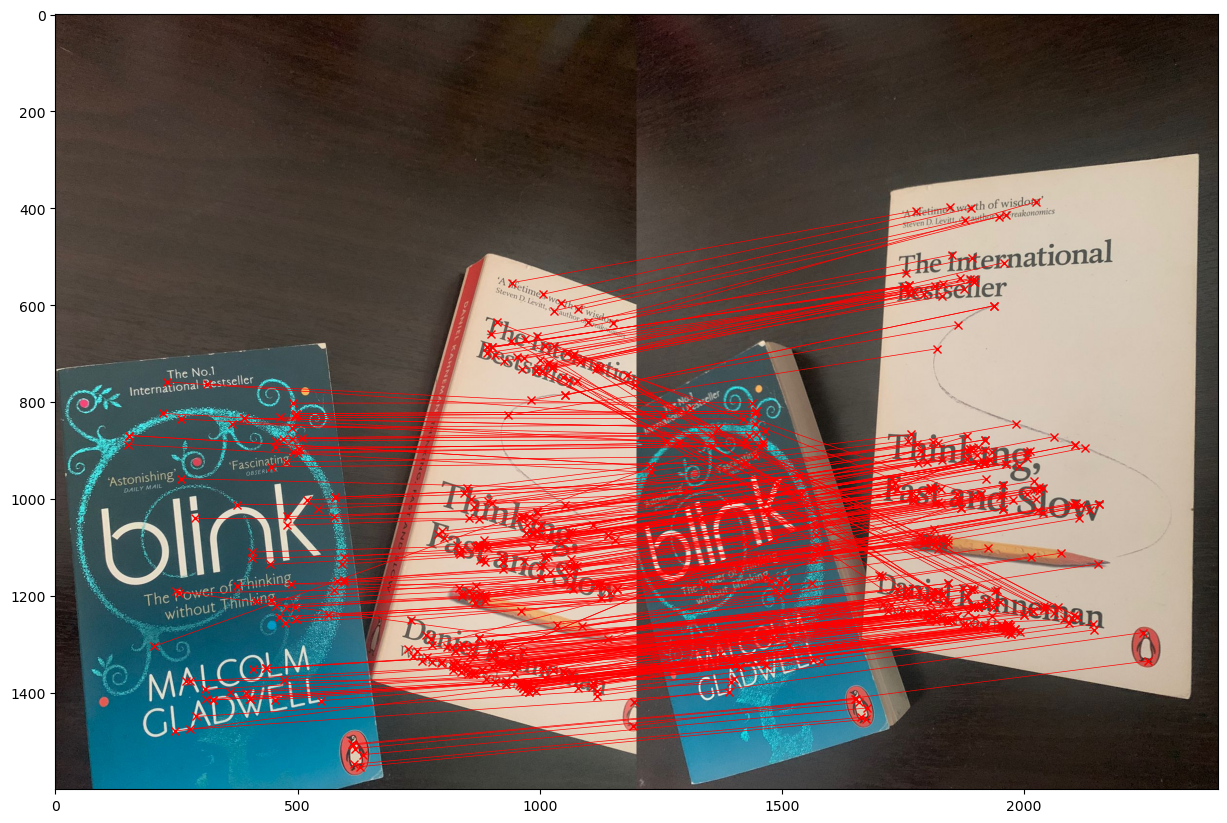

In [21]:
#your answer here
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)           

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:                            
        good.append(m)

# Extract the left and right points from the good matrix
left_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,2)
right_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,2)

# Combine the x and y coordinates of the left and right points into matches_final
# Combine the images by stacking them 
matches_final = np.hstack((left_pts, right_pts))
total_image = np.hstack((left_rgb, right_rgb))

# Call the function to plot the matches
plot_matches(matches_final,total_image)


Use ransac to find the inliers and the homography (H) needed. Play around with the threshold and number of iterations to get reasonably good output. Plot the matches. [/5]

In [22]:
def homography(pairs):
    rows = []
    for i in range(pairs.shape[0]):
        p1 = np.append(pairs[i][0:2], 1)
        p2 = np.append(pairs[i][2:4], 1)
        row1 = [0, 0, 0, p1[0], p1[1], p1[2], -p2[1]*p1[0], -p2[1]*p1[1], -p2[1]*p1[2]]
        row2 = [p1[0], p1[1], p1[2], 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1], -p2[0]*p1[2]]
        rows.append(row1)
        rows.append(row2)
    rows = np.array(rows)
    U, s, V = np.linalg.svd(rows)
    H = V[-1].reshape(3, 3)
    H = H/H[2, 2] # standardize to let w*H[2,2] = 1
    return H

In [23]:
def random_point(matches, k=4):
    idx = random.sample(range(len(matches)), k)
    point = [matches[i] for i in idx ]
    return np.array(point)

In [24]:
def get_error(points, H):
    num_points = len(points)
    all_p1 = np.concatenate((points[:, 0:2], np.ones((num_points, 1))), axis=1)
    all_p2 = points[:, 2:4]
    estimate_p2 = np.zeros((num_points, 2))
    for i in range(num_points):
        temp = np.dot(H, all_p1[i])
        estimate_p2[i] = (temp/temp[2])[0:2]
    errors = np.linalg.norm(all_p2 - estimate_p2 , axis=1) ** 2

    return errors

In [25]:
def ransac(matches, threshold, iters):
    num_best_inliers = 0
    
    for i in range(iters):
        points = random_point(matches)
        H = homography(points)

        #  avoid dividing by zero
        if np.linalg.matrix_rank(H) < 3:
            continue

        errors = get_error(matches, H)
        idx = np.where(errors < threshold)[0]
        inliers = matches[idx]

        num_inliers = len(inliers)
        if num_inliers > num_best_inliers:
            best_inliers = inliers.copy()
            num_best_inliers = num_inliers
            best_H = H.copy()

    print("inliers/matches: {}/{}".format(num_best_inliers, len(matches)))
    return best_inliers, best_H

inliers/matches: 294/357


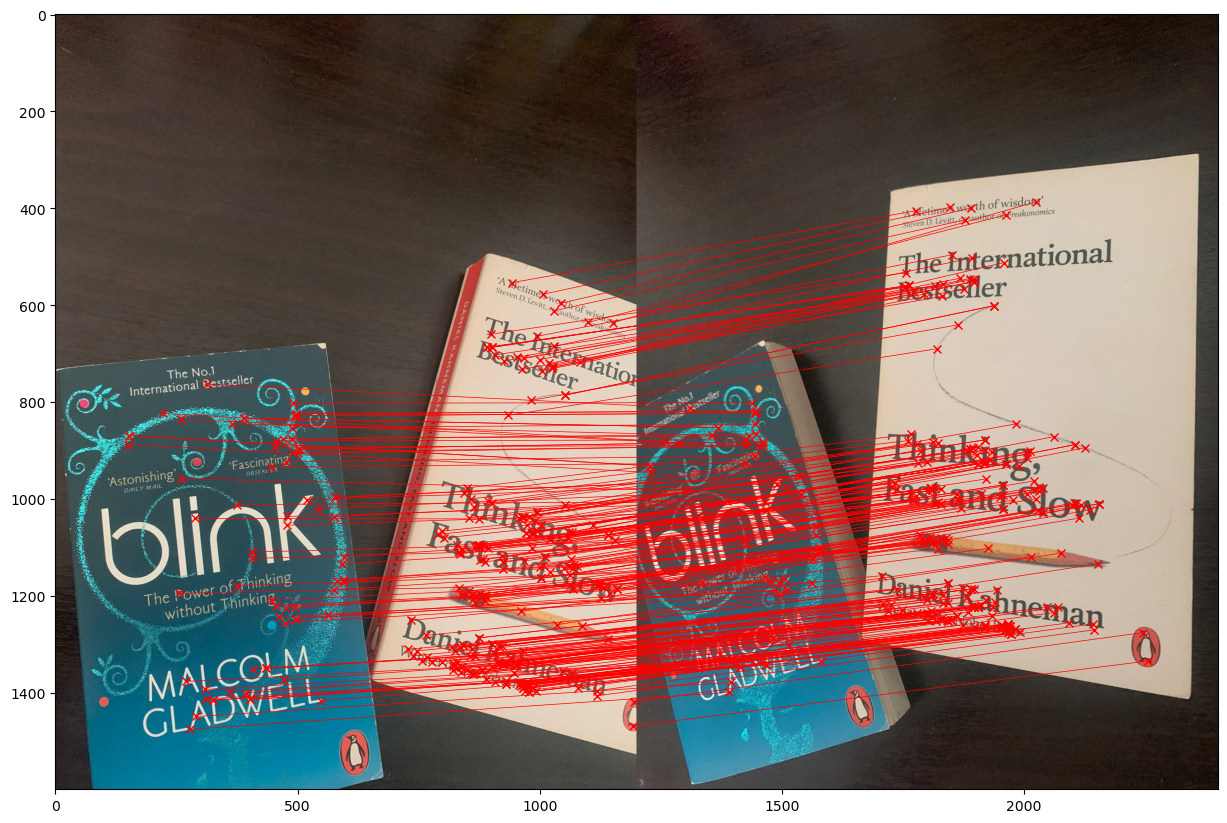

In [26]:
#your answer here

# Use the function to get the inliners and H
# The best threshold and iteration values that worked for me were 20 and 1000 respectively
best_inliners, best_H = ransac(matches_final, 20, 1000)

# Plot the matches
plot_matches(best_inliners, total_image)


stitch the two images together and display your results. [/10]

In [27]:
def stitch_img(left, right, H):
    print("stiching image ...")

    # Convert to double and normalize. Avoid noise.
    left = cv2.normalize(left.astype('float'), None,
                            0.0, 1.0, cv2.NORM_MINMAX)
    # Convert to double and normalize.
    right = cv2.normalize(right.astype('float'), None,
                            0.0, 1.0, cv2.NORM_MINMAX)

    # left image
    height_l, width_l, channel_l = left.shape
    corners = [[0, 0, 1], [width_l, 0, 1], [width_l, height_l, 1], [0, height_l, 1]]
    corners_new = [np.dot(H, corner) for corner in corners]
    corners_new = np.array(corners_new).T
    x_news = corners_new[0] / corners_new[2]
    y_news = corners_new[1] / corners_new[2]
    y_min = min(y_news)
    x_min = min(x_news)

    translation_mat = np.array([[1, 0, -x_min], [0, 1, -y_min], [0, 0, 1]])
    H = np.dot(translation_mat, H)

    # Get height, width
    height_new = int(round(abs(y_min) + height_l))
    width_new = int(round(abs(x_min) + width_l))
    size = (width_new, height_new)

    # right image
    warped_l = cv2.warpPerspective(src=left, M=H, dsize=size)

    height_r, width_r, channel_r = right.shape

    height_new = int(round(abs(y_min) + height_r))
    width_new = int(round(abs(x_min) + width_r))
    size = (width_new, height_new)


    warped_r = cv2.warpPerspective(src=right, M=translation_mat, dsize=size)

    black = np.zeros(3)  # Black pixel.

    # Stitching procedure, store results in warped_l.
    for i in tqdm(range(warped_r.shape[0])):
        for j in range(warped_r.shape[1]):
            pixel_l = warped_l[i, j, :]
            pixel_r = warped_r[i, j, :]

            if not np.array_equal(pixel_l, black) and np.array_equal(pixel_r, black):
                warped_l[i, j, :] = pixel_l
            elif np.array_equal(pixel_l, black) and not np.array_equal(pixel_r, black):
                warped_l[i, j, :] = pixel_r
            elif not np.array_equal(pixel_l, black) and not np.array_equal(pixel_r, black):
                warped_l[i, j, :] = (pixel_l + pixel_r) / 2
            else:
                pass

    stitch_image = warped_l[:warped_r.shape[0], :warped_r.shape[1], :]
    return stitch_image

stiching image ...


  0%|          | 0/1965 [00:00<?, ?it/s]

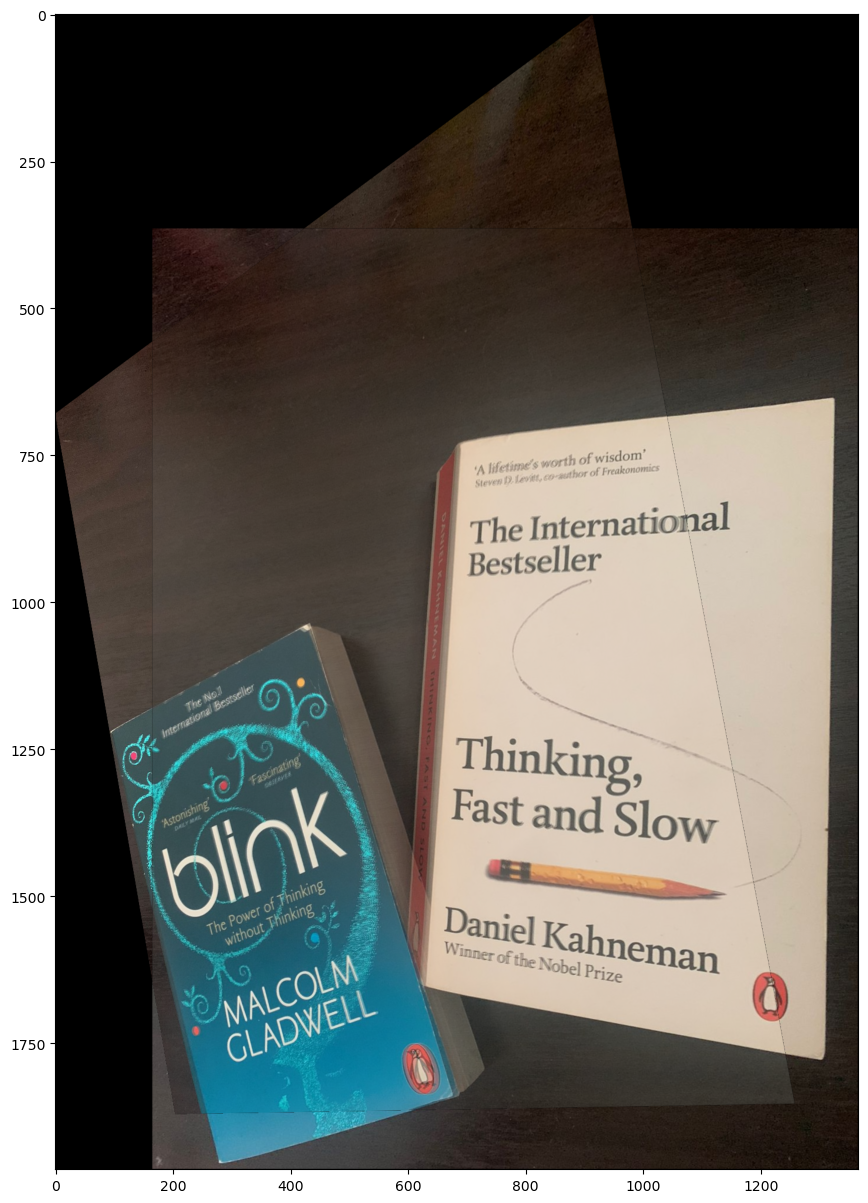

In [28]:
#your answer

# Obtain the stitched image and plot it
stitch_image = stitch_img(left_rgb, right_rgb,best_H)
plt.imshow(stitch_image)

 Comment on your findings. Specifically address the following points. [/5]



1.   Did all books get stitched correctly? Explain why this happened clearly.
2.   How can we imporve these results?



**ANS:** 

As we can see in the image above, most of the image got stitched properly. However, the blue book titled "Blink" was not stitched correctly as seen in the penguin logo on the bottom right of the book. This could be to the lack of sufficient keypoint matches as a result of scaling, etc. 

In order to improve the result, we could make use of other feature detectors such as ORB. Depending on the conditions, other methods could perform better on specific images. Another solution would be to adjust the RANSAC parameters (threshold and number of iterations) to obtain a better value for H. Last but not least, we could also streamline the entire process and utilize cv2.Stitcher, which automates the steps and does the stitching.